# Objective:
- Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.


## Data Dictionary:
- RowNumber: Row number.
- CustomerId: Unique identification key for different customers.
- Surname: Surname of the customer
- Credit Score: Credit score is a measure of an individual's ability to pay back the borrowed amount. It is the numerical representation of their creditworthiness. A credit score is a 3-digit number that falls in the range of 300-900, 900 being the highest.
- Geography: The country to which the customer belongs.
- Gender: The gender of the customer.
- Age: Age of the customer.
- Tenure: The period of time a customer has been associated with the bank.
- Balance: The account balance (the amount of money deposited in the bank account) of the customer.
- NumOfProducts: How many accounts, bank account affiliated products the person has.
- HasCrCard: Does the customer have a credit card through the bank?
- IsActiveMember: Subjective, but for the concept
- EstimatedSalary: Estimated salary of the customer.
- Exited: Did they leave the bank after all?


# Data Preprocessing

## Importing the libraries

In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

import warnings
warnings.filterwarnings('ignore')



## Read dataset

In [2]:
Df_bank=pd.read_csv("bank.csv")
Df_bank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
Df_bank.shape

(10000, 14)

In [4]:
Df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


 - Looking at the data we can see there are two categorical features that need to be encoded : Gender and Geography 


## Bivariate -Barplot

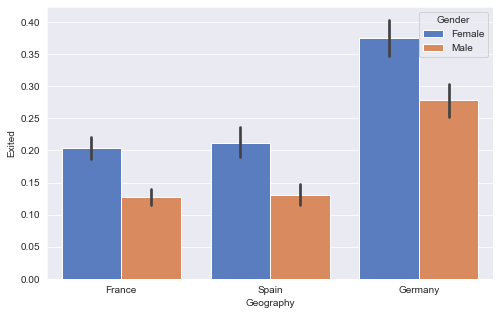

In [5]:
plt.figure(figsize=(8,5))  
ax = sns.barplot( x='Geography', y='Exited',hue='Gender', data=Df_bank, palette='muted')  

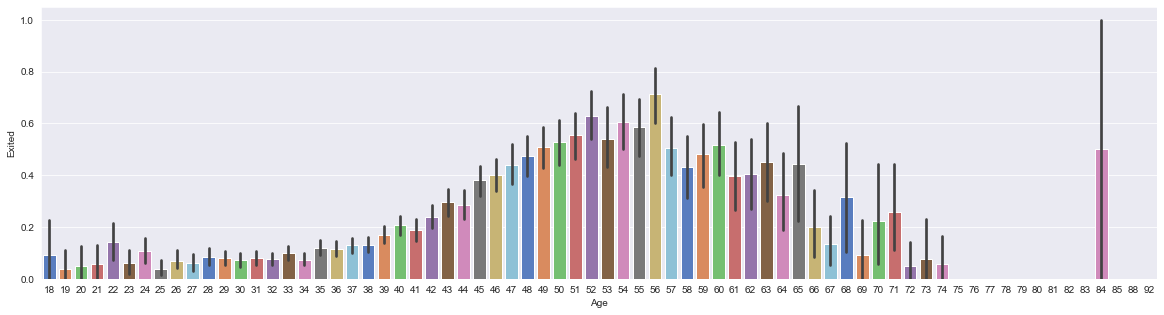

In [6]:
plt.figure(figsize=(20,5))  
ax = sns.barplot( x='Age', y='Exited', data=Df_bank, palette='muted') 

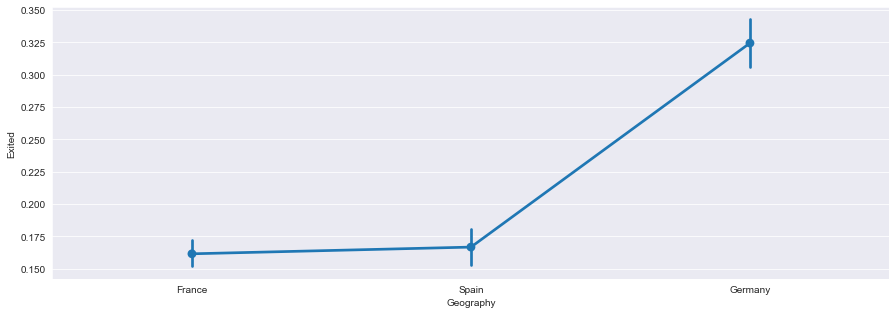

In [7]:
plt.figure(figsize=(15,5))

sns.pointplot(x="Geography", y="Exited", data=Df_bank)
plt.show()

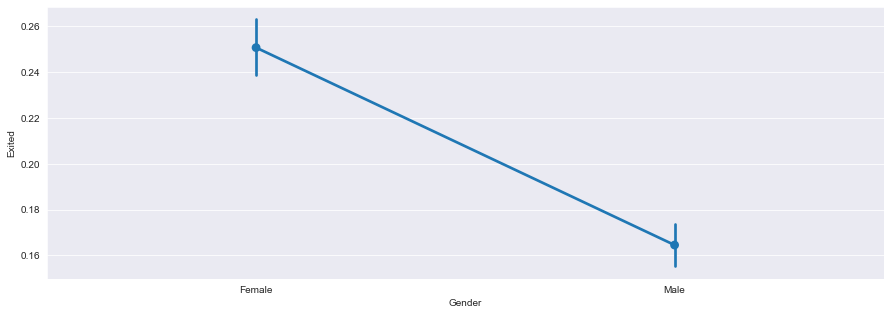

In [8]:
plt.figure(figsize=(15,5))

sns.pointplot(x="Gender", y="Exited", data=Df_bank)
plt.show()

- From data set it seems more number of Females who were from Germany Exited the bank in the past.
- People with age group 50-56 has been exited the bank more

## Drop unique Columns 

 - Excluding first 3 columns because they are not useful.

In [9]:
# separate our predictors (x) from our target variable (y).
x = Df_bank.iloc[:, 3:-1].values

# target variable (y).
y = Df_bank.iloc[:, -1].values

In [10]:
x.shape

(10000, 10)

In [11]:
print(x)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


## Encoding categorical data

In [12]:
# Label Encoding the "Gender" column
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder ()
x[:,2]=le.fit_transform(x[:,2] )

In [13]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [14]:
#One Hot Encoding the "Geography" column
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [15]:
print(x)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


## Splitting the dataset into the Training set and Test set

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [17]:
#  feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
# Scaling fitted only to training set to avoid information leakage.
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# !pip install keras 

# Building the ANN

In [43]:
#Import Keras library and packages
import keras
import sys

from keras.models import Sequential 
from keras.layers import Dense 

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

from tensorflow.keras import optimizers


## ANN Model Initializing and adding layers

In [20]:
ann = tf.keras.models.Sequential()

In [21]:
#Adding input layer and the First hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [22]:
#Adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

In [23]:
# Adding the output layer
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Model compile [optimizers and loss functions]

Keras model "compiled" prior to training

In [49]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Training the ANN

In [29]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3371 - accuracy: 0.8630
Epoch 2/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3370 - accuracy: 0.8622
Epoch 3/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3372 - accuracy: 0.8615
Epoch 4/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3365 - accuracy: 0.8637
Epoch 5/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3362 - accuracy: 0.8633
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3368 - accuracy: 0.8612
Epoch 7/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3366 - accuracy: 0.8625
Epoch 8/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3356 - accuracy: 0.8637
Epoch 9/100
250/250 [==============================] - 1s 3ms/step - loss: 0.3369 - accuracy: 0.8625
Epoch 10/100
250/250 [==============================] - 1s 5ms/step - loss: 0.3359 - accura

# Making the predictions and evaluating the model

## Predicting the Test set results

In [27]:
y_predicted = ann.predict(X_test)
# Convert Predicted probabilities into binary outcome
y_predicted = (y_predicted > 0.5)
print(np.concatenate((y_predicted.reshape(len(y_predicted),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [56]:
# Normalize Model
X_test = preprocessing.normalize(X_test)

## Making the Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_predicted)
print(cm)
accuracy_score(y_test, y_predicted)

[[1532   53]
 [ 223  192]]


0.862

Therefore, Accuracy = 86%

Total correct predictions that customers stay in bank = 1532

Total correct predictions that customers leave the bank = 192

Total incorrect predictions that customers stay in the bank = 223

Total incorrect predictions that customers leave in the bank = 53